In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement_1.csv')

In [3]:
df.sample(5)

,cgpa,placement_exam_marks,placed
314,7.43,14.0,1
125,7.46,55.0,1
778,6.98,34.0,0
852,6.54,43.0,1
943,7.36,2.0,0


In [4]:
df.shape

(1000, 3)

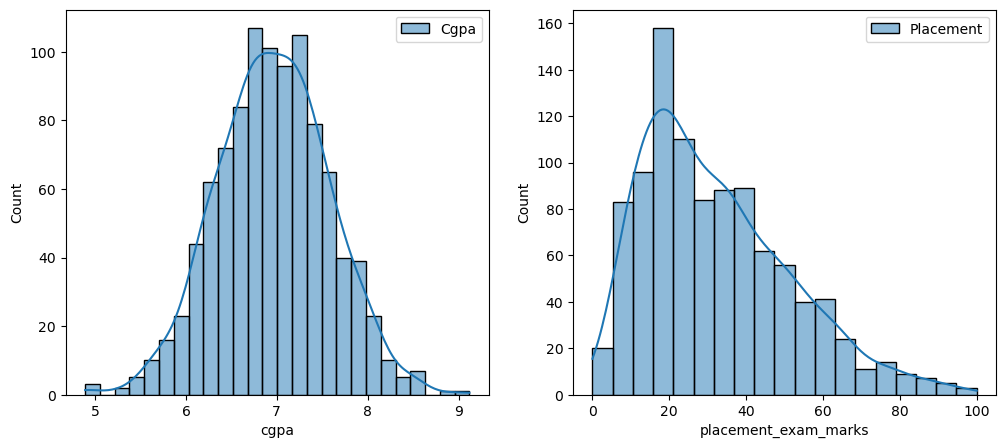

In [5]:
fig, ax = plt.subplots(nrows= 1, ncols = 2, figsize=(12,5))

sns.histplot(df['cgpa'],kde=True,label='Cgpa',ax=ax[0])
ax[0].legend()

sns.histplot(df['placement_exam_marks'],kde = True, label = 'Placement',ax=ax[1])
ax[1].legend()

plt.show()

- ```ekhane amra dekhte pacchi j cgpa column er distribution normal but placement_exam_marks er distribution skewed, tai amra just cgpa er upor **zscore** technique apply korte parbo. placement er upor parbo na.```

In [7]:
# checking if it's right or left skewed. It's right skewed.
df['placement_exam_marks'].skew()

0.8356419499466834

In [8]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323894
Min value of cgpa 4.89
Max value of cgpa 9.12


## Approach 1: 

In [10]:
# Finding the boundary values:

print("Highest allowed :" , df['cgpa'].mean() + 3 * df['cgpa'].std())
print('Lowest allowed :', df['cgpa'].mean() - 3 * df['cgpa'].std())

Highest allowed : 8.808933625397168
Lowest allowed : 5.113546374602832


- ```এই ফর্মুলাটা Z-score কনসেপ্ট থেকে নেওয়া হয়েছে, যেখানে mean ± 3 * standard deviation ব্যবহার করে outlier detection করা হয়।```

**Formula for Boundary values**
```Boundary Values = Mean ± 3 × Standard Deviation```
এখানে,

 1. ```Mean (df['cgpa'].mean()) → ডাটার গড় মান।```
 2. ```Standard Deviation (Std) (df['cgpa'].std()) → ডাটার কতটা ছড়ানো বা পরিবর্তনশীল সেটা বোঝায়।```
```±3 মানে হলো, আমরা প্রায় 99.7% ডাটা কভার করছি (Normal Distribution-এর নিয়ম অনুযায়ী)।```
**এর উদ্দেশ্য কী?**
```এভাবে বের করা Highest allowed এবং Lowest allowed ভ্যালুর বাইরে যেসব cgpa থাকবে, সেগুলো outlier হিসেবে ধরা হতে পারে।```

In [12]:
# Finding the outliers

df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


- ```ekhane amra 5 ta student er data paichi. jara outliers. egula k trimming kore bad diye dibo.```

```Trimming 👇🏿👇```

In [15]:
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


- ```ekhane dekhtechi 5 ta student bad hoye rows hoyeche 995. amader 1000 ta rows chilo. that means 1000 students```

## Approach 2: 

In [18]:
# Calculating the zscore

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [19]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [20]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


- ``` ±3 ব্যবহার করা হয় কারণ normal distribution অনুসারে 99.7% ডাটা (mean ± 3 standard deviations) এর মধ্যে থাকে, তাই এর বাইরে থাকা ডাটাকে outlier হিসেবে ধরা হয়। ```

In [22]:
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [23]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [24]:
# Trimming 
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [25]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


## Capping

In [27]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [28]:
print('upper_limit:',upper_limit)
print('lower_limit:',lower_limit)

upper_limit: 8.808933625397168
lower_limit: 5.113546374602832


In [29]:
df['cgpa'] = np.where(
    df['cgpa'] > upper_limit,
    upper_limit,
    np.where(
        df['cgpa'] > lower_limit,
        lower_limit,
        df['cgpa']
    )
)


 - ```capping mane ekhane amra outliers gula k onno value diye fill kore dibo. cgpa column e j value gula upper_limit theke boro segula upper_limit diye fill kore dichi, jegula lower_limit theke choto segula lower_limit diye fill kor dichi, ar baki gula df['cgpa'] diyei fill kore deya hoyeche.```

In [31]:
df.shape

(1000, 4)

In [32]:
df['cgpa'].describe()

count    1000.000000
mean        5.120307
std         0.165610
min         4.890000
25%         5.113546
50%         5.113546
75%         5.113546
max         8.808934
Name: cgpa, dtype: float64